# Priyansh Sangule CS16B021

In [17]:
%pylab
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import Queue
import threading,time
import sys

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from numpy.random import randn

from scipy import signal
from scipy import integrate

import threading,time
import multiprocessing

from numpy import mean
from numpy import power

from  scipy.io.wavfile import read as wavread


%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## **OOK** (On-Off Key) Code:




Here, when the bit is one, only then the signal is passed.

In [0]:
fs = 44100  # sampling rate
baud = 300  # symbol rate
Nbits = 10  # number of bits
Ns = fs/baud
N = Nbits * Ns
f0 = 1800
bits = randn(Nbits,1) > 0

Text(0.5,1,u'OOK signal of the sequence:[[1 0 0 0 1 0 1 0 1 0]]')

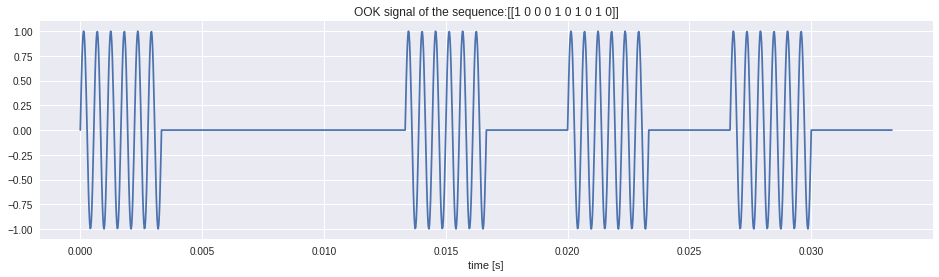

In [19]:
# Random Seed = 1
np.random.seed(seed=1)

#Making Random array of bits of size 10
bits = randn(Nbits,1) > 0

#Tilize the array to 1 x Ns dimension
M = np.tile(bits,(1,Ns))

#Time
t = r_[0.0:N]/fs

#Final plot value of OOK signal.
# Signal present when bit is 1
# Signal absent when bit is 0
OOK = M.ravel()*sin(2*pi*f0*t)

#Plotting the graph
fig = figure(figsize = (16,4))
plot(t,OOK)
xlabel('time [s]')
title('OOK signal of the sequence:'+ np.array2string(transpose(np.uint8(bits))))



## Windowed Sinc Pulses

We processs random bit array to do fast fourier transformation. And get values for OOK accordingly. OOK here doesn't go down to zero directly as above case. These are shaped sinc pulses and take up specific bandwidth as compared to above.

Text(0.5,1,u'TBW=4 shaped OOK/ASK signal of the sequence:[[1 0 0 0 1 0 1 0 1 0]]')

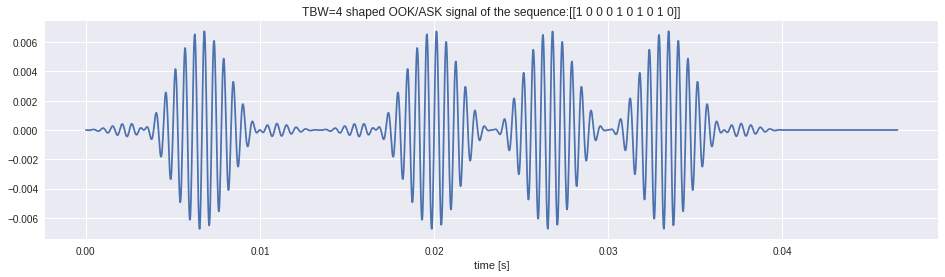

In [20]:
#process random bit array
imp = zeros(N)
imp[::Ns] = bits.ravel()
h = signal.firwin(Ns*4,1.0/Ns)

#Convolve imp and h using the fast Fourier transform method, with the output size full.
imp_sinc = signal.fftconvolve(imp,h,mode='full')

#time
t = r_[0.0:len(imp_sinc)]/fs

#OOK shows shaped waves when imp_sinc is one.
#OOk doesn't show exact zero when bit is zero.
OOK_s = imp_sinc*sin(2*pi*f0*t)


#Plotting the graph
fig = figure(figsize = (16,4))
plot(t,OOK_s)
xlabel('time [s]')
title('TBW=4 shaped OOK/ASK signal of the sequence:'+ np.array2string(transpose(np.uint8(bits))))